In [1]:
import xarray as xr
from netCDF4 import Dataset, num2date
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

/Users/aidanjanney/.local/share/mamba/envs/pangeo/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [ ]:
data = xr.open_dataset("S2S_Data/precip_control.nc")
ds=Dataset("S2S_Data/precip_control.nc")
data

<xarray.Dataset> Size: 129MB
Dimensions:     (time: 6, step: 185, latitude: 121, longitude: 240)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 48B 2024-01-01 2024-02-01 ... 2024-06-01
  * step        (step) timedelta64[ns] 1kB 0 days 00:00:00 ... 46 days 00:00:00
    surface     float64 8B ...
  * latitude    (latitude) float64 968B 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude   (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time  (time, step) datetime64[ns] 9kB ...
Data variables:
    tp          (time, step, latitude, longitude) float32 129MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-09T14:37 GRIB to CDM+CF via cfgrib-0.9.1...

: 

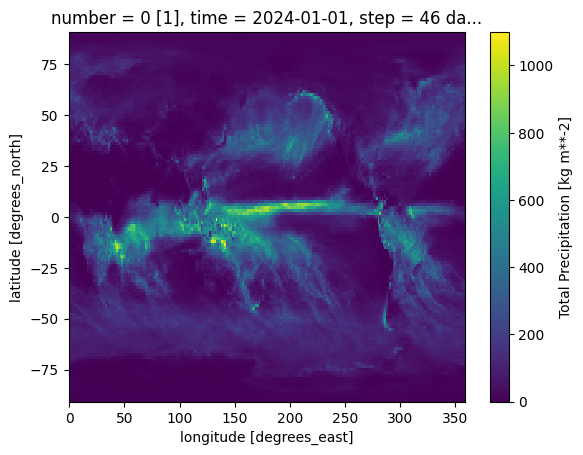

In [14]:
#da.sel(lat=50.5, lon=50.5).plot()
data.tp.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000').plot()

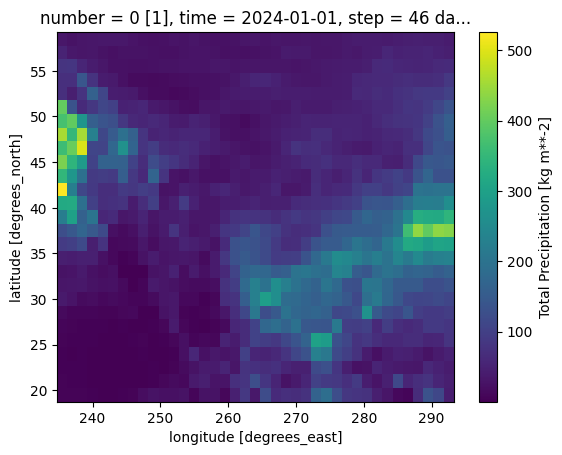

In [5]:
data.tp.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000',latitude=slice('60','19.5'), longitude=slice('235','293')).plot()
#for degrees west, to convert, take the westward coordinate as a negative value and add 360 degrees.
#for degrees north, keep the same

/Users/aidanjanney/.local/share/mamba/envs/pangeo/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


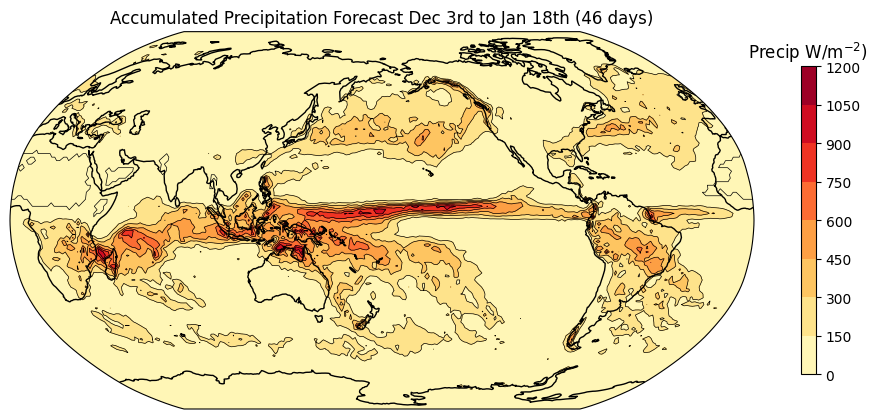

In [6]:
## Now let's make a projected global map plot using cartopy

### set up global map using cartopy
field, lon = add_cyclic_point(data.tp.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000'), coord=data.longitude)
lat = data.latitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

# add filled contours
cf = ax.contourf(lon, lat, field, cmap='YlOrRd', transform=ccrs.PlateCarree());
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()
# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('Precip W/m$^{-2}$)')
# add title
ax.set_title('Accumulated Precipitation Forecast Dec 3rd to Jan 18th (46 days)');

/Users/aidanjanney/.local/share/mamba/envs/pangeo/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/aidanjanney/.local/share/mamba/envs/pangeo/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


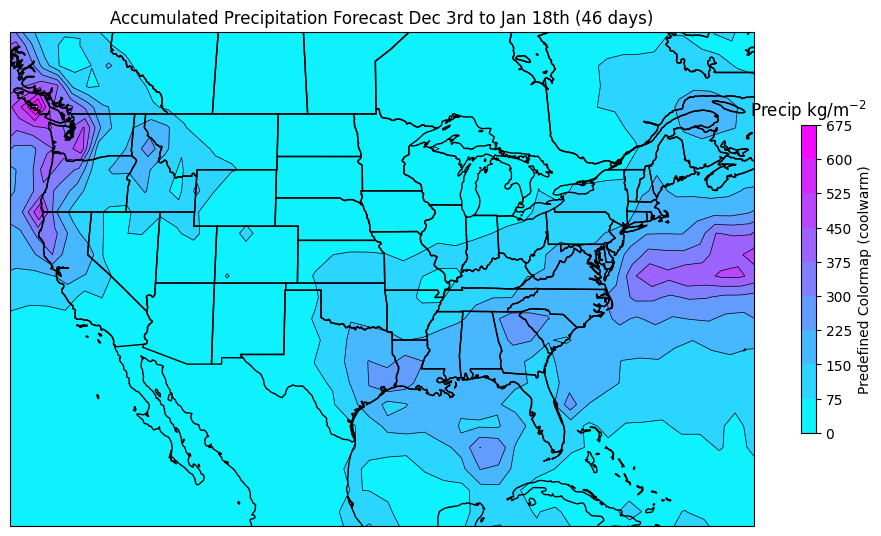

In [7]:
## Now let's make a projected global map plot using cartopy

### set up global map using cartopy
field, lon = add_cyclic_point(data.tp.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000'), coord=data.longitude)
lat = data.latitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=-98))
ax.set_extent([-125, -65, 20, 55], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
levels = [0, 75, 150, 225, 300, 375, 450, 525, 600, 675]
# add filled contours
cf = ax.contourf(lon, lat, field, levels=levels, cmap='cool', transform=ccrs.PlateCarree())
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', levels=levels, linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()

# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('Precip kg/m$^{-2}$')
cb.set_label('Predefined Colormap (coolwarm)')

# add title
ax.set_title('Accumulated Precipitation Forecast Dec 3rd to Jan 18th (46 days)');

In [8]:
#0-750 levels and get 10 of them? sure
level_list=[]
for i in range(750):
    if i%75==0:
        level_list.append(i)
print(level_list)
    

[0, 75, 150, 225, 300, 375, 450, 525, 600, 675]


### Now we get to do some temp data :D

In [9]:
temp_data = xr.open_dataset("S2S_Data/temp_control.nc")
temp_data

<xarray.Dataset> Size: 32MB
Dimensions:            (time: 6, step: 46, latitude: 121, longitude: 240)
Coordinates:
    number             int64 8B ...
  * time               (time) datetime64[ns] 48B 2024-01-01 ... 2024-06-01
  * step               (step) timedelta64[ns] 368B 1 days 2 days ... 46 days
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 968B 90.0 88.5 87.0 ... -88.5 -90.0
  * longitude          (longitude) float64 2kB 0.0 1.5 3.0 ... 355.5 357.0 358.5
    valid_time         (time, step) datetime64[ns] 2kB ...
Data variables:
    t2m                (time, step, latitude, longitude) float32 32MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-09T14:42 GRIB to CDM+CF via cfgrib-0.9.1...

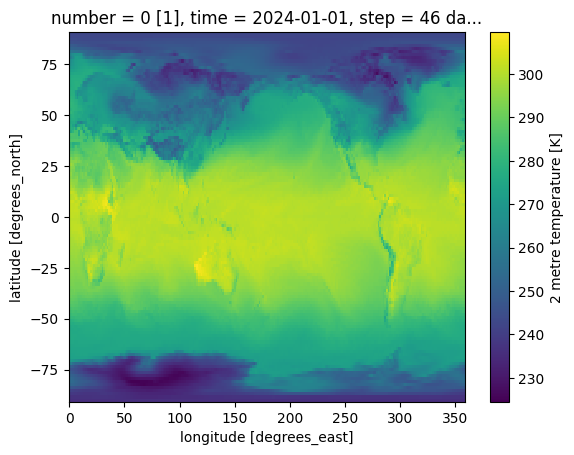

In [10]:
#da.sel(lat=50.5, lon=50.5).plot()
temp_data.t2m.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000').plot()

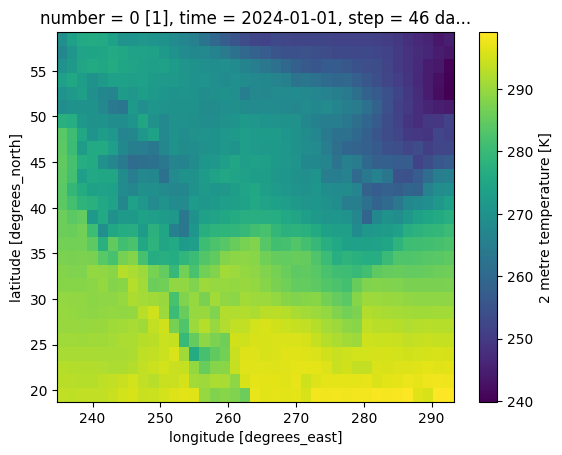

In [11]:
temp_data.t2m.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000',latitude=slice('60','19.5'), longitude=slice('235','293')).plot()
#for degrees west, to convert, take the westward coordinate as a negative value and add 360 degrees.
#for degrees north, keep the same

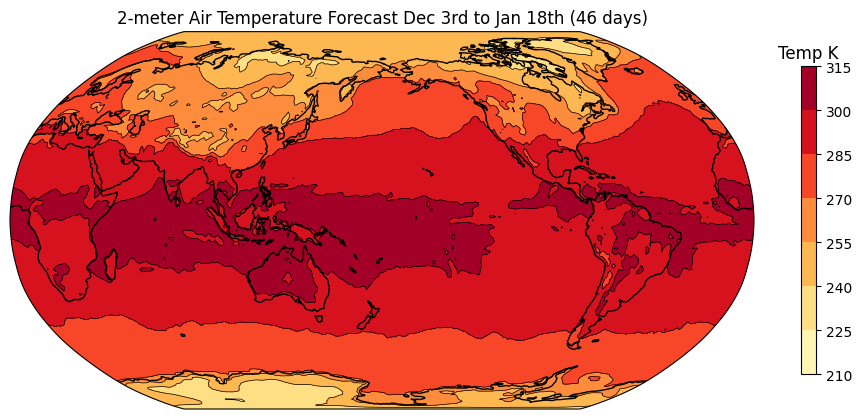

In [12]:
## Now let's make a projected global map plot using cartopy

### set up global map using cartopy
field, lon = add_cyclic_point(temp_data.t2m.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000'), coord=temp_data.longitude)
lat = temp_data.latitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

# add filled contours
cf = ax.contourf(lon, lat, field, cmap='YlOrRd', transform=ccrs.PlateCarree());
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()
# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('Temp K')
# add title
ax.set_title('2-meter Air Temperature Forecast Dec 3rd to Jan 18th (46 days)');

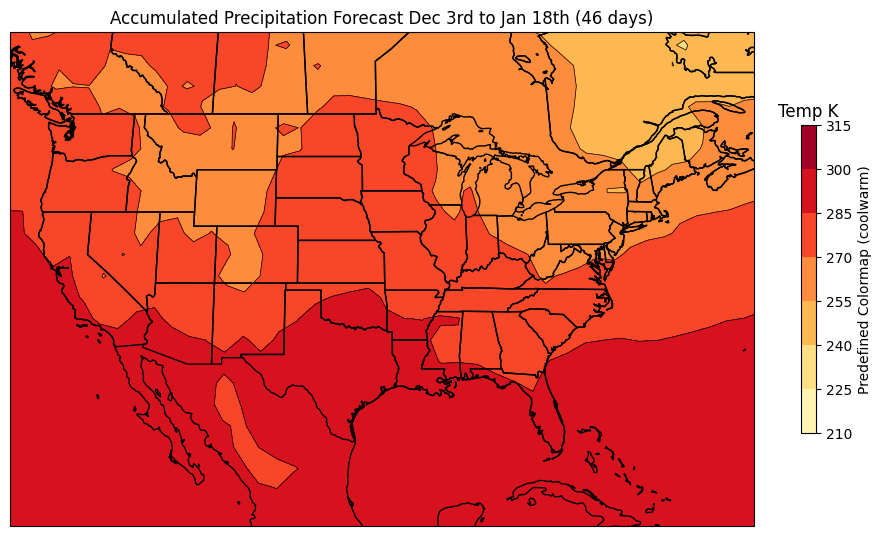

In [13]:
## Now let's make a projected global map plot using cartopy

### set up global map using cartopy
field, lon = add_cyclic_point(temp_data.t2m.sel(time='2024-01-01T00:00:00.000000000',step='3974400000000000'), coord=temp_data.longitude)
lat = temp_data.latitude
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=-98))
ax.set_extent([-125, -65, 20, 55], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
#levels = [0, 75, 150, 225, 300, 375, 450, 525, 600, 675]
# add filled contours
cf = ax.contourf(lon, lat, field, cmap='YlOrRd', transform=ccrs.PlateCarree())
# add contour lines
cs = ax.contour(lon, lat, field, colors='k', linewidths=0.5, transform=ccrs.PlateCarree())
# add contour labels
#lb = plt.clabel(cs, fontsize=10, inline=True, fmt='%r');
# add coastlines
ax.coastlines()

# add colorbar including label
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('Temp K')
cb.set_label('Predefined Colormap (coolwarm)')

# add title
ax.set_title('Accumulated Precipitation Forecast Dec 3rd to Jan 18th (46 days)');